# Imports

In [1]:
import numpy as np
from PIL import Image
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import MNIST, ImageFolder
from torchvision import transforms

from sklearn.datasets import make_regression
from sklearn.metrics import (
    classification_report, accuracy_score,
    f1_score, confusion_matrix,
)

from torchsummary import summary

import seaborn as sns
from matplotlib import pyplot as plt

import os

# <p align='center' style='color: #6c89c6;'>Работу выполнил: Таратин Артём ПМ22-1</p>

# Манипуляции с тензорами

## Создание тензоров <a class="anchor" id="создание-тензоров"></a>

In [ ]:
# В pytorch все основано на операциях с тензорами
# Тензоры могут иметь:
# 0 измерений - скаляры
# 1 измерение - векторы
# 2 измерения - матрицы
# 3, 4, ... измерения - тензоры

# Создание не инициализизированного тензора: torch.empty(size)
# Нужно помнить, что перед использованием такого тензора его обязательно нужно инициализировать!

x = torch.empty(1)  # scalar
print(x)
x = torch.empty(3)  # vector, 1D
print(x)
x = torch.empty(2, 3)  # matrix, 2D
print(x)
x = torch.empty(2, 2, 3)  # tensor, 3 dimensions
print(x)
x = torch.empty(2, 2, 2, 3)  # tensor, 4 dimensions
print(x)

tensor([-4.5114e-16])
tensor([3.5733e-43, 0.0000e+00, 0.0000e+00])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
tensor([[[[0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.]]]])


In [ ]:
# Большинство операций с тензорами очень похожа на опреации с массивами NumPy, но часть имеют небольшие отличия:
x_np = np.empty((2, 2, 3))
print(x_np)
# x_np = np.empty(2,2,3) # Ошибка!

[[[5.92464730e-312 2.47032823e-322 0.00000000e+000]
  [0.00000000e+000 6.95208261e-310 1.33664410e+160]]

 [[5.33720646e-091 1.51924684e-047 2.81298770e-033]
  [1.80201686e+185 3.99910963e+252 3.43974750e+175]]]


In [ ]:
# Создание тензора, заполненного случайными значениями (равномерно распредленными в [0, 1]): torch.rand(size)
x = torch.rand(5, 3)
x

tensor([[0.9460, 0.7882, 0.0923],
        [0.4902, 0.2125, 0.7410],
        [0.6332, 0.2464, 0.7472],
        [0.3681, 0.4406, 0.1339],
        [0.6238, 0.2333, 0.7509]])

In [ ]:
# Создание тензоров заполненных:
# нулями:
x = torch.zeros(5, 3)
print(x)
# единицами:
x = torch.ones(5, 3)
print(x)
# тензор c единицами на главной диагонали:
x = torch.eye(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# определение размера тензора:
x.size()

torch.Size([5, 3])

In [ ]:
# для каждого тензора задан тип значений:
print(x.dtype)  # тип заданный автоматически

# явное указание типа:
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)


In [ ]:
x = torch.Tensor(2, 3)  # аналогично torch.empty
x

tensor([[-4.5802e-16,  9.9492e-43,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [ ]:
# создание тензора из данных:
x = torch.Tensor([[0.6768, 0.5198, 0.6978], [0.1581, 0.2027, 0.3723]])
x

tensor([[0.6768, 0.5198, 0.6978],
        [0.1581, 0.2027, 0.3723]])

In [ ]:
# создание тензора из данных:
x = torch.tensor([[6, 51, 6], [15, 0, 37]])
print(x, type(x), x.dtype)

x = torch.tensor([[6, 51, 6], [15, 0, 37]], dtype=torch.float64)
print(x, type(x), x.dtype)

tensor([[ 6, 51,  6],
        [15,  0, 37]]) <class 'torch.Tensor'> torch.int64
tensor([[ 6., 51.,  6.],
        [15.,  0., 37.]], dtype=torch.float64) <class 'torch.Tensor'> torch.float64


In [ ]:
# создание тензора из массива numpy:
a = np.array([1, 2, 3])
x = torch.from_numpy(a)
x

tensor([1, 2, 3], dtype=torch.int32)

In [ ]:
# Carful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other

a[0] += 10
print(a)
print(x)

[11  2  3]
tensor([11,  2,  3], dtype=torch.int32)


In [ ]:
# torch to numpy with .numpy()
# Специфика использования общего массива данных сохраняется!
b = x.numpy()
b

array([11,  2,  3])

In [ ]:
# заполнение тензора значениями:
x = torch.Tensor(2, 3)
x.fill_(0.5)  # функции, оканчивающиеся на _ меняют значение тензора inplace
x

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])

Справка по операциям создания тензоров тут: https://pytorch.org/docs/stable/torch.html#creation-ops

### Арифметические операции и математические функции: <a class="anchor" id="aрифметические"></a>

In [ ]:
x = torch.rand(2, 2)
print(f"x:\n {x}\n")
y = torch.rand(2, 2)
print(f"y:\n {y}\n")

# поэлементное сложение:
z = x + y
print(f"z = x + y:\n {z}\n")
z = torch.add(x, y)
print(f"z = torch.add(x,y):\n {z}\n")

x:
 tensor([[0.7082, 0.6959],
        [0.2558, 0.9132]])

y:
 tensor([[0.5740, 0.5481],
        [0.0809, 0.9770]])

z = x + y:
 tensor([[1.2823, 1.2440],
        [0.3367, 1.8902]])

z = torch.add(x,y):
 tensor([[1.2823, 1.2440],
        [0.3367, 1.8902]])



In [ ]:
y2 = y.clone().detach()  # копирование содержимого тензора в новый тензор
print(f"y2:\n {y2}\n")

y2.add_(x)
print(f"y2.add_(x) in place:\n {y2}\n")

y2:
 tensor([[0.5740, 0.5481],
        [0.0809, 0.9770]])

y2.add_(x) in place:
 tensor([[1.2823, 1.2440],
        [0.3367, 1.8902]])



In [ ]:
# вычитание:
z = x - y
z = torch.sub(x, y)
print(f"z = torch.sub(x, y):\n {z}\n")

# умножение (поэлементное!):
z = x * y
z = torch.mul(x, y)
print(f"z = torch.mul(x,y):\n {z}\n")

# деление:
z = x / y
z = torch.div(x, y)
print(f"z = torch.div(x,y):\n {z}\n")

z = torch.sub(x, y):
 tensor([[ 0.1342,  0.1479],
        [ 0.1750, -0.0638]])

z = torch.mul(x,y):
 tensor([[0.4065, 0.3814],
        [0.0207, 0.8922]])

z = torch.div(x,y):
 tensor([[1.2338, 1.2698],
        [3.1630, 0.9347]])



In [ ]:
print(f"x - y:\n {x - y}\n")

z = torch.abs(x - y)  # полэлементный рассчет модуля
print(f"z = torch.abs(x - y):\n {z}\n")

z = x - y
z.abs_()
print(f"z.abs_():\n {z}\n")

x - y:
 tensor([[ 0.1342,  0.1479],
        [ 0.1750, -0.0638]])

z = torch.abs(x - y):
 tensor([[0.1342, 0.1479],
        [0.1750, 0.0638]])

z.abs_():
 tensor([[0.1342, 0.1479],
        [0.1750, 0.0638]])



In [ ]:
torch.cos(x)  # поэлементный рассчет cos
# x.cos_()

tensor([[0.7595, 0.7675],
        [0.9675, 0.6112]])

In [ ]:
torch.sigmoid(x)  # рассчет сигмоиды
# x.sigmoid_()

tensor([[0.6700, 0.6673],
        [0.5636, 0.7137]])

Справка по математическим опреациям тут: https://pytorch.org/docs/stable/torch.html#math-operations

#### Операции, изменяющие размер тензора: <a class="anchor" id="размер"></a>
* [к оглавлению](#разделы)

In [ ]:
# Операции среза (slicing) (работает аналогично NumPy):
x = torch.rand(5, 3)
print(x)
print(x[1, 1])  # элемент с индексо 1, 1 (результат: тензор размерности 0!)
print(x[:, 0])  # все строки, столбец 0
print(x[1, :])  # строка 1, все столбцы

tensor([[0.7138, 0.2471, 0.6717],
        [0.0373, 0.5937, 0.7310],
        [0.9484, 0.3353, 0.8093],
        [0.7989, 0.3761, 0.9186],
        [0.1488, 0.2010, 0.8336]])
tensor(0.5937)
tensor([0.7138, 0.0373, 0.9484, 0.7989, 0.1488])
tensor([0.0373, 0.5937, 0.7310])


In [ ]:
# тензор размерности 0 (скаляр), все равно остается типом 'torch.Tensor':
print(x[1, 1], type(x[1, 1]))

tensor(0.5937) <class 'torch.Tensor'>


In [ ]:
# получение самого значения из тензора размерности 0:
print(x[1, 1].item())

0.5937265753746033


In [ ]:
# итерирование по тензору:
for v in x[1, :]:
    print(v.item())

0.03734868764877319
0.5937265753746033
0.7309621572494507


In [ ]:
# Изменение формы тензора (reshape) с помощью torch.view():
x = torch.randn(4, 4)  # матрица 4 на 4
print(x, x.size(), "\n")

tensor([[ 0.4164,  0.3138,  0.4193, -0.4315],
        [-0.8047,  0.0067, -1.0980,  0.3134],
        [-0.0957,  0.6471,  1.4447, -0.7019],
        [ 0.5640, -1.0908,  1.4601,  0.3345]]) torch.Size([4, 4]) 



In [ ]:
y = x.view(16)  # вектор из 16 компонент
print(y, y.size(), "\n")
z = x.view(2, 2, 4)  # тензор 2 на 2 на 4
print(z, z.size(), "\n")

tensor([ 0.4164,  0.3138,  0.4193, -0.4315, -0.8047,  0.0067, -1.0980,  0.3134,
        -0.0957,  0.6471,  1.4447, -0.7019,  0.5640, -1.0908,  1.4601,  0.3345]) torch.Size([16]) 

tensor([[[ 0.4164,  0.3138,  0.4193, -0.4315],
         [-0.8047,  0.0067, -1.0980,  0.3134]],

        [[-0.0957,  0.6471,  1.4447, -0.7019],
         [ 0.5640, -1.0908,  1.4601,  0.3345]]]) torch.Size([2, 2, 4]) 



In [ ]:
t = x.view(
    -1, 8
)  # размер -1 означает, что размерность этой компоненты будет подобрана автоматически
print(t, t.size())

tensor([[ 0.4164,  0.3138,  0.4193, -0.4315, -0.8047,  0.0067, -1.0980,  0.3134],
        [-0.0957,  0.6471,  1.4447, -0.7019,  0.5640, -1.0908,  1.4601,  0.3345]]) torch.Size([2, 8])


In [ ]:
x1 = torch.rand(2, 3)
print(x1)
y1 = torch.rand(2, 3)
print(y1)

tensor([[0.0926, 0.3118, 0.3955],
        [0.1013, 0.1723, 0.8476]])
tensor([[0.0080, 0.9232, 0.2711],
        [0.2135, 0.7795, 0.3130]])


In [ ]:
# Конкатенация (concatenation):

# Concatenates 2 tensors on zeroth dimension:
concat1 = torch.cat((x1, y1))
print(concat1, concat1.size())

# Concatenates 2 tensors on zeroth dimension
x = torch.rand(2, 3)
concat2 = torch.cat((x1, y1), dim=0)
print(concat2, concat2.size())

# Concatenates 2 tensors on first dimension
x = torch.rand(2, 3)
concat3 = torch.cat((x1, y1), dim=1)
print(concat3, concat3.size())

tensor([[0.0926, 0.3118, 0.3955],
        [0.1013, 0.1723, 0.8476],
        [0.0080, 0.9232, 0.2711],
        [0.2135, 0.7795, 0.3130]]) torch.Size([4, 3])
tensor([[0.0926, 0.3118, 0.3955],
        [0.1013, 0.1723, 0.8476],
        [0.0080, 0.9232, 0.2711],
        [0.2135, 0.7795, 0.3130]]) torch.Size([4, 3])
tensor([[0.0926, 0.3118, 0.3955, 0.0080, 0.9232, 0.2711],
        [0.1013, 0.1723, 0.8476, 0.2135, 0.7795, 0.3130]]) torch.Size([2, 6])


In [ ]:
# Разбиение тензора (split):
print(x1)

splitted1 = x1.split(split_size=1, dim=0)
print(splitted1, splitted1[0].size())  # 2 tensors of 2x2 and 1x2 size

splitted2 = x1.split(split_size=2, dim=1)
print(
    splitted2[0], splitted2[0].size(), "\n", splitted2[1], splitted2[1].size()
)  # 2 tensors of 2x2 and 1x2 size

tensor([[0.0926, 0.3118, 0.3955],
        [0.1013, 0.1723, 0.8476]])
(tensor([[0.0926, 0.3118, 0.3955]]), tensor([[0.1013, 0.1723, 0.8476]])) torch.Size([1, 3])
tensor([[0.0926, 0.3118],
        [0.1013, 0.1723]]) torch.Size([2, 2]) 
 tensor([[0.3955],
        [0.8476]]) torch.Size([2, 1])


In [ ]:
# stack:
print(x1)
print(y1)

stacked1 = torch.stack((x1, y1), dim=0)
print(stacked1, stacked1.size())  # возвращает тензор: 2(в результате stak!) x 2 x 3

tensor([[0.0926, 0.3118, 0.3955],
        [0.1013, 0.1723, 0.8476]])
tensor([[0.0080, 0.9232, 0.2711],
        [0.2135, 0.7795, 0.3130]])
tensor([[[0.0926, 0.3118, 0.3955],
         [0.1013, 0.1723, 0.8476]],

        [[0.0080, 0.9232, 0.2711],
         [0.2135, 0.7795, 0.3130]]]) torch.Size([2, 2, 3])


In [ ]:
stacked2 = torch.stack((x1, y1), dim=1)
print(stacked2, stacked2.size())  # возвращает тензор: 2 x 2(в результате stak!) x 3

tensor([[[0.0926, 0.3118, 0.3955],
         [0.0080, 0.9232, 0.2711]],

        [[0.1013, 0.1723, 0.8476],
         [0.2135, 0.7795, 0.3130]]]) torch.Size([2, 2, 3])


In [ ]:
# sqeeze and unsqueeze
x2 = torch.rand(3, 2, 1)  # a tensor of size 3x2x1
print(x2)
squeezed1 = x2.squeeze()
print(squeezed1)  # remove the 1 sized dimension

tensor([[[0.8240],
         [0.9296]],

        [[0.2884],
         [0.3572]],

        [[0.9202],
         [0.6503]]])
tensor([[0.8240, 0.9296],
        [0.2884, 0.3572],
        [0.9202, 0.6503]])


In [ ]:
x3 = torch.rand(3)
print(x3)

with_fake_dimension1 = x3.unsqueeze(0)
print(
    with_fake_dimension1, with_fake_dimension1.size()
)  # added a fake zeroth dimensionz

with_fake_dimension2 = x3.unsqueeze(1)
print(
    with_fake_dimension2, with_fake_dimension2.size()
)  # added a fake zeroth dimensionz

tensor([0.0148, 0.2274, 0.7602])
tensor([[0.0148, 0.2274, 0.7602]]) torch.Size([1, 3])
tensor([[0.0148],
        [0.2274],
        [0.7602]]) torch.Size([3, 1])


In [ ]:
# Распространение (broadcasting) - так же как в NumPy:

t1 = torch.arange(1.0, 5.0)
t3 = torch.arange(0.0, 3.0)
print(t1, t3)
tm = t1.ger(t3)
print(tm, tm.size())

tensor([1., 2., 3., 4.]) tensor([0., 1., 2.])
tensor([[0., 1., 2.],
        [0., 2., 4.],
        [0., 3., 6.],
        [0., 4., 8.]]) torch.Size([4, 3])


In [ ]:
t1 * tm

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1

In [ ]:
t1[:, np.newaxis] * tm

tensor([[ 0.,  1.,  2.],
        [ 0.,  4.,  8.],
        [ 0.,  9., 18.],
        [ 0., 16., 32.]])

In [ ]:
t1 * tm.T

tensor([[ 0.,  0.,  0.,  0.],
        [ 1.,  4.,  9., 16.],
        [ 2.,  8., 18., 32.]])

In [ ]:
t1.shape

torch.Size([4])

In [ ]:
t1.size(), tm.size(), tm.size(0)

(torch.Size([4]), torch.Size([4, 3]), 4)

In [ ]:
print(t1.unsqueeze(1))
print(tm)

tensor([[1.],
        [2.],
        [3.],
        [4.]])
tensor([[0., 1., 2.],
        [0., 2., 4.],
        [0., 3., 6.],
        [0., 4., 8.]])


In [ ]:
t1.unsqueeze(1) * tm

tensor([[ 0.,  1.,  2.],
        [ 0.,  4.,  8.],
        [ 0.,  9., 18.],
        [ 0., 16., 32.]])

In [ ]:
t1.unsqueeze(1).size(), tm.size()

(torch.Size([4, 1]), torch.Size([4, 3]))

#### Операции агрегации: <a class="anchor" id="агрегации"></a>
* [к оглавлению](#разделы)

In [ ]:
mat = torch.tensor([[0.0, 1.0, 2.0], [0.0, 2.0, 4.0], [0.0, 3.0, 6.0], [0.0, 4.0, 8.0]])

# суммирование по всем элементам:
mat.sum()

tensor(30.)

In [ ]:
# суммирование по оси 0:
mat.sum(dim=0)

tensor([ 0., 10., 20.])

In [ ]:
# суммирование по оси 1:
mat.sum(dim=1)

tensor([ 3.,  6.,  9., 12.])

In [ ]:
# получение среднего значения:

print(mat.mean())
print(mat.mean(dim=0))
print(mat.mean(dim=1))

tensor(2.5000)
tensor([0.0000, 2.5000, 5.0000])
tensor([1., 2., 3., 4.])


#### Матричные операции: <a class="anchor" id="матричные"></a>
* [к оглавлению](#разделы)

In [ ]:
# Умножение (поэлементное!):

x = torch.rand(2, 2)
print(f"x:\n {x}\n")
y = torch.rand(2, 2)
print(f"y:\n {y}\n")

z = x * y
print(f"z = torch.mul(x,y):\n {z}\n")
z = torch.mul(x, y)
print(f"z = torch.mul(x,y):\n {z}\n")

x:
 tensor([[0.0565, 0.8277],
        [0.4019, 0.1110]])

y:
 tensor([[0.7624, 0.7915],
        [0.4682, 0.0586]])

z = torch.mul(x,y):
 tensor([[0.0431, 0.6551],
        [0.1882, 0.0065]])

z = torch.mul(x,y):
 tensor([[0.0431, 0.6551],
        [0.1882, 0.0065]])



In [ ]:
# Умножение матрицы на вектор:

# torch.mv(input, vec, out=None) → Tensor
# Performs a matrix-vector product of the matrix input and the vector vec.
# If input is a (n \times m)(n×m) tensor, vec is a 1-D tensor of size mm , out will be 1-D of size nn .

mat = torch.randn(2, 3)
print(mat, mat.size())
vec = torch.randn(3)
print(vec, vec.size())
res = torch.mv(mat, vec)
print(res, res.size())

tensor([[-1.7613,  1.6505, -0.4095],
        [ 0.3940, -0.5887, -0.6166]]) torch.Size([2, 3])
tensor([ 0.3372, -0.4361,  0.4460]) torch.Size([3])
tensor([-1.4964,  0.1146]) torch.Size([2])


In [ ]:
# Умножение матрицы на матрицу:

# torch.mm(input, mat2, out=None) → Tensor
# Performs a matrix multiplication of the matrices input and mat2.
# If input is a (n×m) tensor, mat2 is a (m×p) tensor, out will be a (n×p) tensor.

mat1 = torch.randn(2, 3)
print(mat1, mat1.size())
mat2 = torch.randn(3, 3)
print(mat2, mat2.size())
res = torch.mm(mat1, mat2)
print(res, res.size())

tensor([[ 0.5826,  1.0309, -0.2949],
        [ 1.4914, -0.5143, -0.9869]]) torch.Size([2, 3])
tensor([[-0.7848, -1.2220,  0.0648],
        [-1.4567,  1.1853, -0.4477],
        [ 0.1605,  1.5593,  0.8356]]) torch.Size([3, 3])
tensor([[-2.0063,  0.0502, -0.6702],
        [-0.5797, -3.9710, -0.4977]]) torch.Size([2, 3])


In [ ]:
mat1.mm(mat2)

tensor([[-2.0063,  0.0502, -0.6702],
        [-0.5797, -3.9710, -0.4977]])

In [ ]:
# Outer product of 2 vectors
vec1 = torch.arange(1, 4)  # Size 3
print(vec1, vec1.size())
vec2 = torch.arange(1, 3)  # Size 2
print(vec2, vec2.size())
res = torch.ger(
    vec1, vec2
)  # vec1 - рассматривается как вектор-столбец; vec2 - рассматривается как вектор-строка
print(res, res.size())  # Size 3x2

tensor([1, 2, 3]) torch.Size([3])
tensor([1, 2]) torch.Size([2])
tensor([[1, 2],
        [2, 4],
        [3, 6]]) torch.Size([3, 2])


In [ ]:
vec1.ger(vec2)

tensor([[1, 2],
        [2, 4],
        [3, 6]])

__Функция matmul__

* Matrix product of two tensors: `torch.matmul(input, other, out=None)` → Tensor
* The behavior depends on the dimensionality of the tensors as follows:
    * If __both tensors are 1-dimensional__, the __dot product (scalar) is returned__.
    * If __both arguments are 2-dimensional__, the __matrix-matrix product is returned__.
    * If the __first argument is 1-dimensional and the second argument is 2-dimensional__, a 1 is prepended to its dimension for the purpose of the matrix multiply. After the matrix multiply, the prepended dimension is removed.
    * If the __first argument is 2-dimensional and the second argument is 1-dimensional__, the matrix-vector product is returned.
    * If __both arguments are at least 1-dimensional and at least one argument is N-dimensional (where N > 2)__, then a batched matrix multiply is returned. If the first argument is 1-dimensional, a 1 is prepended to its dimension for the purpose of the batched matrix multiply and removed after. If the second argument is 1-dimensional, a 1 is appended to its dimension for the purpose of the batched matrix multiple and removed after. The non-matrix (i.e. batch) dimensions are broadcasted (and thus must be broadcastable). For example, if input is a $j \times 1 \times n \times m$ tensor and other is a $k \times m \times p$ tensor, out will be an $j \times k \times n \times p$ tensor.

In [ ]:
torch.arange(4)

tensor([0, 1, 2, 3])

In [ ]:
torch.arange(3 * 4).view(3, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
# vector x vector
tensor1 = torch.randn(3)
print(tensor1, tensor1.size())
tensor2 = torch.randn(3)
print(tensor2, tensor2.size())
res = torch.matmul(tensor1, tensor2)
print(res, res.size())  # результат: скаляр

tensor([ 0.5414, -0.5718,  0.6430]) torch.Size([3])
tensor([ 1.2537,  0.2538, -0.7962]) torch.Size([3])
tensor(0.0216) torch.Size([])


In [ ]:
# Вызов функции matmul можно выполнять с помощью оператора @:
tensor1 @ tensor2

tensor(0.0216)

In [ ]:
# vector x matrix
tensor1 = torch.arange(3 * 4).view(3, 4)
print(tensor1, tensor1.size())
tensor2 = torch.arange(3)
print(tensor2, tensor2.size())

res = torch.matmul(tensor2, tensor1)
print(res, res.size())

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) torch.Size([3, 4])
tensor([0, 1, 2]) torch.Size([3])
tensor([20, 23, 26, 29]) torch.Size([4])


In [ ]:
# или:
tensor2 @ tensor1

tensor([20, 23, 26, 29])

In [ ]:
# matrix x vector
tensor1 = torch.arange(3 * 4).view(3, 4)
print(tensor1, tensor1.size())
tensor2 = torch.arange(4)
print(tensor2, tensor2.size())

res = torch.matmul(tensor1, tensor2)
print(res, res.size())

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) torch.Size([3, 4])
tensor([0, 1, 2, 3]) torch.Size([4])
tensor([14, 38, 62]) torch.Size([3])


In [ ]:
tensor1 @ tensor2

tensor([14, 38, 62])

In [ ]:
# batched matrix x broadcasted vector
tensor1 = torch.randn(10, 3, 4)
print(tensor1, tensor1.size(), "\n------------")
tensor2 = torch.randn(4)
print(tensor2, tensor2.size(), "\n------------")
res = torch.matmul(tensor1, tensor2)
print(res, res.size())

tensor([[[ 1.7615, -1.7631,  0.4349, -0.6304],
         [-1.1468,  1.5635, -1.4728,  1.4979],
         [-2.0460, -0.2602,  0.8594, -0.6496]],

        [[-0.8606, -0.1757, -0.9371,  0.2939],
         [ 0.8248, -0.8789,  1.0729,  0.7116],
         [-0.2411, -0.1234,  0.2328, -0.7381]],

        [[-1.2233, -0.7129, -0.6197,  0.9168],
         [ 0.0181,  0.1617,  1.7460, -0.0185],
         [ 0.9813,  1.2280,  2.1491, -0.1907]],

        [[ 0.2550,  0.1735,  2.4484, -0.3165],
         [-0.4825, -0.6916,  0.1290, -0.3414],
         [-0.2275, -0.6790, -0.1668, -0.3515]],

        [[ 0.5920,  0.6669, -0.5918,  1.8040],
         [ 1.3388, -0.1425,  1.7298,  0.4734],
         [-1.2845,  0.5181, -0.0863, -1.5978]],

        [[-0.2243, -0.3738, -0.8697, -0.0726],
         [-0.8212, -1.5015, -0.1081, -0.4611],
         [ 0.3651, -0.0276, -0.3429,  0.3328]],

        [[-0.9803,  0.9105, -1.4610, -1.0204],
         [-1.1910,  1.1390, -1.6797,  0.7093],
         [-0.3371,  0.0223,  0.5625, -0.5272]],


In [ ]:
# batched matrix x batched matrix
tensor1 = torch.randn(10, 3, 4)
print(tensor1.size(), "\n------------")
tensor2 = torch.randn(10, 4, 5)
print(tensor2.size(), "\n------------")
res = torch.matmul(tensor1, tensor2)
print(res.size())

torch.Size([10, 3, 4]) 
------------
torch.Size([10, 4, 5]) 
------------
torch.Size([10, 3, 5])


In [ ]:
# batched matrix x broadcasted matrix
tensor1 = torch.randn(10, 3, 4)
print(tensor1.size(), "\n------------")
tensor2 = torch.randn(4, 5)
print(tensor2, tensor2.size(), "\n------------")
res = torch.matmul(tensor1, tensor2)
print(res.size())

torch.Size([10, 3, 4]) 
------------
tensor([[ 1.6888, -0.2648,  0.7374,  0.2498,  1.4302],
        [ 1.3287, -0.7802,  0.0771, -0.2632, -0.6546],
        [-1.3305, -0.1855,  1.1486,  1.2171,  1.8859],
        [-0.4627, -0.5245,  0.9507, -0.0350,  0.1994]]) torch.Size([4, 5]) 
------------
torch.Size([10, 3, 5])


# Автоматическое дифференцирование

In [ ]:
x = torch.tensor([5.0, 1.0])
w = torch.tensor([1.0], requires_grad=True)

f = (x * w).sum()
f.backward()
x * w, f, w.grad

(tensor([5., 1.], grad_fn=<MulBackward0>),
 tensor(6., grad_fn=<SumBackward0>),
 tensor([6.]))

In [ ]:
# Если не обнулять градиенты, они будут накапливаться после каждого backward вызова
f = (x * w).sum()
f.backward()
w.grad

tensor([12.])

In [ ]:
w.grad.zero_()

tensor([0.])

## Задача 1

Реализуйте слой линейной регрессии и совершите обучение на данных ниже при помощи автоматического дифференцирования. Проверьте корректность обучения, визуализируйте ошибку

In [ ]:
class Neuron:
    def __init__(self, n_features: int) -> None:
        self.w = torch.rand(n_features, requires_grad=True, dtype=torch.float64)
        self.b = torch.tensor(1, requires_grad=True, dtype=torch.float64)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        y_pred = inputs.type(torch.float64)@self.w + self.b
        return y_pred

In [ ]:
n_features = 4
X, y, coef = make_regression(
    n_features=n_features, n_informative=4, coef=True, bias=0.5
)
coef

array([65.72658292, 63.49562167,  2.73747407, 34.81162936])

In [ ]:
loss = torch.nn.MSELoss()
layer = Neuron(n_features=n_features)
learning_rate = 1e-2
num_epochs = 100

for _ in range(num_epochs):
    for x_el, y_el in zip(X, y):
        x_el_t = torch.tensor(x_el)
        y_el_t = torch.tensor(y_el)

        y_pred = layer.forward(x_el_t)
        loss.forward(y_pred, y_el_t).backward()

        with torch.no_grad():
            layer.w -= learning_rate * layer.w.grad
            layer.b -= learning_rate * layer.b.grad

            layer.w.grad.zero_()
            layer.b.grad.zero_()

In [ ]:
layer.w, coef

(tensor([65.7266, 63.4956,  2.7375, 34.8116], dtype=torch.float64,
        requires_grad=True),
 array([65.72658292, 63.49562167,  2.73747407, 34.81162936]))

In [ ]:
layer.b

tensor(0.5000, dtype=torch.float64, requires_grad=True)

# Модули и оптимизаторы

Modules

In [ ]:
layer = nn.Linear(3, 4)
list(layer.parameters())

[Parameter containing:
 tensor([[ 0.3507, -0.3459, -0.4409],
         [-0.0530,  0.1757,  0.2602],
         [-0.4989,  0.3280, -0.4804],
         [ 0.1760,  0.1633, -0.4876]], requires_grad=True),
 Parameter containing:
 tensor([-0.4815, -0.4160, -0.1686, -0.3563], requires_grad=True)]

In [ ]:
class MyModule(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer1 = nn.Linear(2, 2)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(2, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

layer = MyModule()
list(layer.parameters())

[Parameter containing:
 tensor([[ 0.2499,  0.4387],
         [ 0.4513, -0.3436]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6046, -0.4166], requires_grad=True),
 Parameter containing:
 tensor([[0.4473, 0.6985]], requires_grad=True),
 Parameter containing:
 tensor([-0.2984], requires_grad=True)]

In [ ]:
layer = nn.Sequential(nn.Linear(2, 2), nn.ReLU(), nn.Linear(2, 1))
list(layer.parameters())

[Parameter containing:
 tensor([[ 0.6198, -0.3546],
         [ 0.3124, -0.5849]], requires_grad=True),
 Parameter containing:
 tensor([-0.1115,  0.0677], requires_grad=True),
 Parameter containing:
 tensor([[-0.7019, -0.2028]], requires_grad=True),
 Parameter containing:
 tensor([0.4784], requires_grad=True)]

In [ ]:
torch.tensor([1]).cuda()

tensor([1], device='cuda:0')

In [ ]:
layer.cuda()

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Optimizer

In [ ]:
optimizer = torch.optim.SGD(layer.parameters(), lr=1e-2)

# Когда посчитаны градиенты - обновить веса:
optimizer.step()

optimizer.zero_grad()

Dataset/dataloader

In [ ]:
# Пример датасета
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
class SinDataset(Dataset):
    def __init__(self, X: torch.Tensor, y: torch.Tensor):
        assert X.ndim == y.ndim == 2
        self.X = X
        self.y = y

    def __len__(self) -> int:
        return len(self.X)

    def __getitem__(self, idx) -> dict[str, torch.Tensor]:
        return {
            'feature': self.X[idx],
            'target': self.y[idx],
        }


dataset = SinDataset(X, y)

dataset[0]

{'feature': tensor([0.]), 'target': tensor([0.0544])}

In [ ]:
dataloader = DataLoader(dataset, batch_size=10)

for batch in dataloader:
    print(f"X_batch: {batch['feature'].shape}, y_batch: {batch['target'].shape}")

X_batch: torch.Size([10, 1]), y_batch: torch.Size([10, 1])
X_batch: torch.Size([10, 1]), y_batch: torch.Size([10, 1])
X_batch: torch.Size([10, 1]), y_batch: torch.Size([10, 1])
X_batch: torch.Size([10, 1]), y_batch: torch.Size([10, 1])
X_batch: torch.Size([10, 1]), y_batch: torch.Size([10, 1])
X_batch: torch.Size([10, 1]), y_batch: torch.Size([10, 1])
X_batch: torch.Size([10, 1]), y_batch: torch.Size([10, 1])
X_batch: torch.Size([10, 1]), y_batch: torch.Size([10, 1])
X_batch: torch.Size([10, 1]), y_batch: torch.Size([10, 1])
X_batch: torch.Size([10, 1]), y_batch: torch.Size([10, 1])


Transforms

In [ ]:
to_tensor_transform = transforms.ToTensor()
image = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
]).astype('uint8')
to_tensor_transform(image)

tensor([[[0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039]]])

In [ ]:
to_tensor_transform(Image.fromarray(image))

tensor([[[0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039]]])

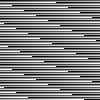

In [ ]:
to_pil_transform = transforms.ToPILImage()
image = torch.arange(10000).reshape(100, 100).to(torch.uint8)
to_pil_transform(image)

In [ ]:
# Можно объединять трансформы
transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
])

Compose(
    ToTensor()
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
)

## Задача 2. Решить задачу классификации на датасете MNIST

* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели
* Обучить модель
* Вывести график функции потерь по эпохам
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью.

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [45]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [46]:
transform = transforms.ToTensor()
train_dataset = MNIST('./datasets/mnist', train=True, download=True, transform=transform)
test_dataset = MNIST('./datasets/mnist', train=False, download=True, transform=transform)

In [47]:
train_loader = DataLoader(train_dataset, batch_size=16384)
test_loader = DataLoader(test_dataset, batch_size=16384)

In [48]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 128)
        self.layer4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        return self.layer4(x)

In [49]:
model = MyModule().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [50]:
(28 * 28 + 1) * 128 + \
(128 + 1) * 128 * 2 + \
(128 + 1) * 10

134794

In [51]:
summary(model, (28 * 28,))  # Total params: 134,794

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                  [-1, 128]          16,512
              ReLU-5                  [-1, 128]               0
            Linear-6                  [-1, 128]          16,512
              ReLU-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.51
Estimated Total Size (MB): 0.53
----------------------------------------------------------------


In [52]:
loss_list = []
num_epochs = 20
for epoch in range(num_epochs):
    loss_sum = 0
    for i, data in enumerate(train_loader):
        model.train()
        X, y = data[0].to(device), data[1].to(device)

        y_pred = model.forward(X)

        loss = criterion.forward(y_pred, y)

        optimizer.zero_grad()

        loss.backward()

        loss_sum += loss.item()

        optimizer.step()

    print(f'Epoch {epoch + 1}, Loss: {loss_sum:.4f}')
    loss_list.append(loss_sum)

Epoch 1, Loss: 9.1439
Epoch 2, Loss: 8.8495
Epoch 3, Loss: 8.1770
Epoch 4, Loss: 6.9628
Epoch 5, Loss: 5.3835
Epoch 6, Loss: 3.9222
Epoch 7, Loss: 2.9220
Epoch 8, Loss: 2.3592
Epoch 9, Loss: 2.0444
Epoch 10, Loss: 1.8302
Epoch 11, Loss: 1.6658
Epoch 12, Loss: 1.5390
Epoch 13, Loss: 1.4405
Epoch 14, Loss: 1.3594
Epoch 15, Loss: 1.2863
Epoch 16, Loss: 1.2250
Epoch 17, Loss: 1.1739
Epoch 18, Loss: 1.1285
Epoch 19, Loss: 1.0866
Epoch 20, Loss: 1.0490


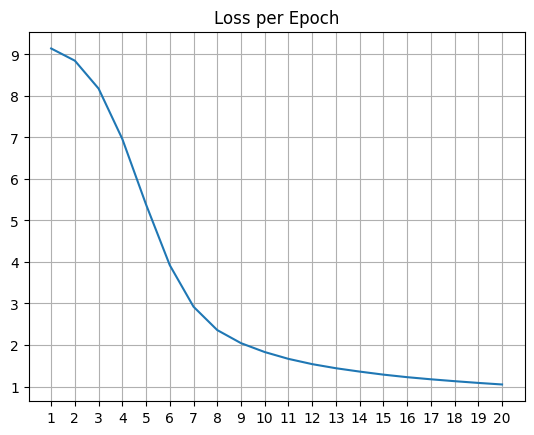

In [53]:
X_lab = range(1, len(loss_list)+1)
plt.plot(X_lab, loss_list)
plt.title('Loss per Epoch')
plt.xticks(X_lab)
plt.grid(True)
plt.show()

In [55]:
y_pred_list, y_true_list = [], []
for i, data in enumerate(test_loader):
    X, y = data[0].to(device), data[1].to(device)

    with torch.no_grad():
        y_pred = model(X)
    _, predicted = torch.max(y_pred, 1)

    y_pred_list.extend(predicted.tolist())
    y_true_list.extend(y.tolist())

In [56]:
accuracy_score(y_true_list, y_pred_list), f1_score(y_true_list, y_pred_list, average='macro')

(0.9266, 0.9255798841501729)

<Axes: >

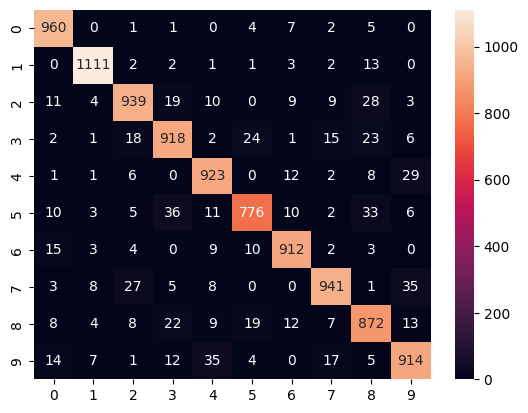

In [57]:
sns.heatmap(confusion_matrix(y_true_list, y_pred_list), annot=True, fmt='.0f')

In [58]:
print(classification_report(y_true_list, y_pred_list))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.91      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.93      0.87      0.90       892
           6       0.94      0.95      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.88      0.90      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Предсказание 6, Правда 6


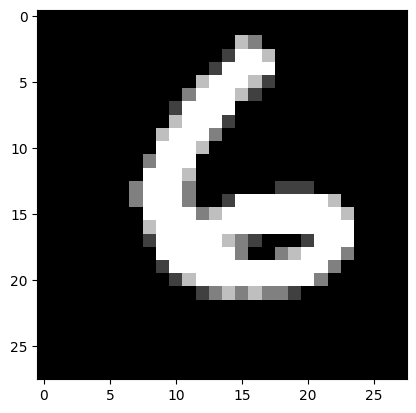

In [80]:
ix = torch.randint(0, len(test_dataset), (1,))
image = test_dataset.data[ix]
y_true = test_dataset.targets[ix]
image_flat = image.numpy().flatten()

X = torch.tensor(image_flat, dtype=torch.float32).unsqueeze(0).to(device)
y_pred = model(X)

_, value = torch.max(y_pred, 1)
print(f'Предсказание {value.item()}, Правда {y_true.item()}')

to_pil_transform = transforms.ToPILImage()
plt.imshow(to_pil_transform(image), cmap='gray')
plt.show()

In [81]:
folder_path = './models'
model_name = '01_torch_intro_task_2.pth'
full_path = '/'.join((folder_path, model_name))

if not os.path.exists(folder_path):
    os.mkdir(folder_path)

torch.save(model.state_dict(), full_path)
# model.load_state_dict(torch.load(full_path))

# ДЗ
## Задача 3. Решить задачу классификации собак и кошек (датасет [cats_dogs.zip](https://disk.yandex.ru/d/wQtt5O1JF9ctnA)).
* Загрузить архив с данными на диск
* Создать датасет
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью.

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Попытаться выбить наилучшее качество на тестовом датасете.

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
folder_path = './datasets/cats_dogs/train'
img_shape = (3, 128, 128)
device

device(type='cuda')

In [6]:
transform = transforms.Compose([
    transforms.Resize(img_shape[1:]),
    transforms.ToTensor(),
])
dataset = ImageFolder(root=folder_path, transform=transform)
dataset

Dataset ImageFolder
    Number of datapoints: 25000
    Root location: ./datasets/cats_dogs/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [7]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [8]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(128, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2),
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(8192, 128),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer3(x)
        x = self.layer3(x)
        x = self.classifier(x)
        return x

In [9]:
model = MyModule().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [10]:
loss_list = []
num_epochs = 10
for epoch in range(num_epochs):
    loss_sum = 0
    for i, data in enumerate(train_loader):
        model.train()
        X, y = data[0].to(device), data[1].to(device)

        y_pred = model.forward(X)

        loss = criterion.forward(y_pred, y)

        optimizer.zero_grad()

        loss.backward()

        loss_sum += loss.item()

        optimizer.step()

        if i % 10 == 0:
            print(f'!Epoch {epoch + 1}, Loss: {loss_sum:.4f}, {i}')

    print(f'Epoch {epoch + 1}, Loss: {loss_sum:.4f}')
    loss_list.append(loss_sum)

!Epoch 1, Loss: 0.7069, 0
!Epoch 1, Loss: 48.4503, 10
!Epoch 1, Loss: 61.6852, 20
!Epoch 1, Loss: 70.5840, 30
!Epoch 1, Loss: 79.5718, 40
!Epoch 1, Loss: 87.9038, 50
!Epoch 1, Loss: 95.6601, 60
!Epoch 1, Loss: 102.3906, 70
!Epoch 1, Loss: 109.2781, 80
!Epoch 1, Loss: 116.0790, 90
!Epoch 1, Loss: 123.9443, 100
!Epoch 1, Loss: 131.2365, 110
!Epoch 1, Loss: 138.3122, 120
!Epoch 1, Loss: 144.1574, 130
!Epoch 1, Loss: 150.0149, 140
!Epoch 1, Loss: 155.5247, 150
Epoch 1, Loss: 159.0117
!Epoch 2, Loss: 0.5737, 0
!Epoch 2, Loss: 5.9710, 10
!Epoch 2, Loss: 11.4123, 20
!Epoch 2, Loss: 16.6847, 30
!Epoch 2, Loss: 21.7922, 40
!Epoch 2, Loss: 27.0551, 50
!Epoch 2, Loss: 32.3691, 60
!Epoch 2, Loss: 37.5061, 70
!Epoch 2, Loss: 42.5970, 80
!Epoch 2, Loss: 47.5676, 90
!Epoch 2, Loss: 52.5882, 100
!Epoch 2, Loss: 57.7478, 110
!Epoch 2, Loss: 62.5872, 120
!Epoch 2, Loss: 67.1721, 130
!Epoch 2, Loss: 71.6826, 140
!Epoch 2, Loss: 76.2174, 150
Epoch 2, Loss: 79.0728
!Epoch 3, Loss: 0.3839, 0
!Epoch 3, Loss:

In [11]:
y_pred_list, y_true_list = [], []
for i, data in enumerate(train_loader):
    X, y = data[0].to(device), data[1].to(device)

    with torch.no_grad():
        y_pred = model(X)
    _, predicted = torch.max(y_pred, 1)

    y_pred_list.extend(predicted.tolist())
    y_true_list.extend(y.tolist())

In [12]:
accuracy_score(y_true_list, y_pred_list), f1_score(y_true_list, y_pred_list, average='macro')

(0.9815, 0.9814985996290059)

In [13]:
y_pred_list, y_true_list = [], []
for i, data in enumerate(test_loader):
    X, y = data[0].to(device), data[1].to(device)

    with torch.no_grad():
        y_pred = model(X)
    _, predicted = torch.max(y_pred, 1)

    y_pred_list.extend(predicted.tolist())
    y_true_list.extend(y.tolist())

In [14]:
accuracy_score(y_true_list, y_pred_list), f1_score(y_true_list, y_pred_list, average='macro')

(0.9312, 0.9311576592067186)

<Axes: >

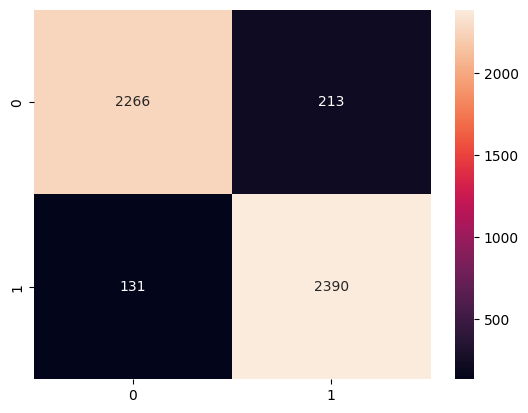

In [15]:
sns.heatmap(confusion_matrix(y_true_list, y_pred_list), annot=True, fmt='.0f')

In [16]:
folder_path = './models'
model_name = '01_torch_intro_task_3.pth'
full_path = '/'.join((folder_path, model_name))

if not os.path.exists(folder_path):
    os.mkdir(folder_path)

torch.save(model.state_dict(), full_path)
# model.load_state_dict(torch.load(full_path))